C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.5000 - loss: 3.3354 - val_accuracy: 0.5200 - val_loss: 2.7386
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 354ms/step - accuracy: 0.6691 - loss: 1.0757 - val_accuracy: 0.7133 - val_loss: 0.6106
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - accuracy: 0.7825 - loss: 0.4262 - val_accuracy: 0.6867 - val_loss: 0.7386
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.8603 - loss: 0.3533 - val_accuracy: 0.7733 - val_loss: 0.4710
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - accuracy: 0.8692 - loss: 0.3314 - val_accuracy: 0.7267 - val_loss: 0.5979
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 378ms/step - accuracy: 0.9142 - loss: 0.2245 - val_accuracy: 0.7667 - val_loss: 0.6306
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - accuracy: 0.9356 - loss: 0.1830 - val_accuracy: 0.7800 - val_loss: 0.6965
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 358ms/step - accuracy: 0.9061 - loss: 0.2663 - val_accuracy: 0

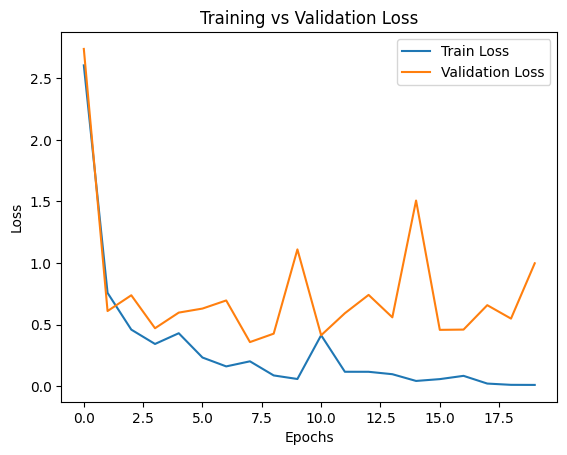

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8602 - loss: 1.4586
Test Accuracy: 0.8267


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set dataset path
dataset_path = "Global"  # Update if needed

# Categories (binary classification: normal vs sick)
categories = ["Normal_images", "Sick_images"]

# Image loading settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")
max_images_per_class = 500  # Limit each category to 100 images

# Load images and labels
data, labels = [], []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    
    if not os.path.exists(folder_path):
        print(f"Warning: {folder_path} does not exist.")
        continue  # Skip if the folder doesn't exist

    images_added = 0  # Track number of images per class

    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith(valid_extensions) and images_added < max_images_per_class:
            img_path = os.path.join(folder_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)  # Load and resize
                img_array = img_to_array(img) / 255.0  # Normalize (0 to 1)
                data.append(img_array)
                labels.append(category)
                images_added += 1  # Increment count
            except Exception as e:
                print(f"Skipping file {img_name}: {e}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Convert "normal" and "sick" to numeric values (0 & 1)
labels = to_categorical(labels)  # One-hot encoding

# Train-validation-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build CNN Model
model = Sequential([
    Flatten(input_shape=img_size + (3,)),  # Flatten image data
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(len(categories), activation="softmax")  # Output layer with 2 classes
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 63, 63, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,822,402 (56.54 MB)

 Trainable params: 14,822,018 (56.54 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 773ms/step - accuracy: 0.6126 - loss: 10.5039 - val_accuracy: 0.6650 - val_loss: 0.8875
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 742ms/step - accuracy: 0.8080 - loss: 4.5892 - val_accuracy: 0.5200 - val_loss: 6.8804
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 782ms/step - accuracy: 0.8245 - loss: 3.5093 - val_accuracy: 0.5200 - val_loss: 4.7368
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 824ms/step - accuracy: 0.9016 - loss: 1.6352 - val_accuracy: 0.5200 - val_loss: 7.2911
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 768ms/step - accuracy: 0.8966 - loss: 1.5967 - val_accuracy: 0.5200 - val_loss: 10.4007
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 758ms/step - accuracy: 0.9305 - loss: 1.3509 - val_accuracy: 0.5300 - val_loss: 3.0545
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 762ms/step - accuracy: 0.9317 - loss: 0.8708 - val_accuracy: 0.5300 - val_loss: 5.2919
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 782ms/step - accuracy: 0.9443 - loss: 0.6651 - val_ac

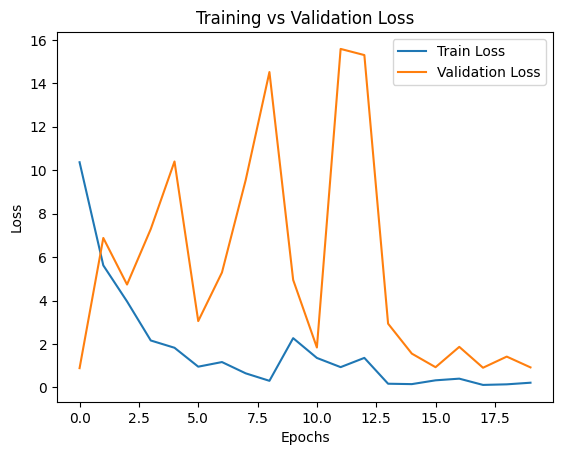

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.9084 - loss: 0.8118
Validation Accuracy: 0.8900


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import UnidentifiedImageError  # Handle image errors

# Set dataset path
dataset_path = "Global"  # Update if needed

# Categories (binary classification: normal vs sick)
categories = ["Normal_images", "Sick_images"]

# Image settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")
max_images_per_class = 500  # Limit to 100 images per class

# Load images and labels
data, labels = [], []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    
    if not os.path.exists(folder_path):
        print(f"Warning: {folder_path} does not exist.")
        continue  # Skip if the folder doesn't exist
    
    images_added = 0  # Track number of images added for this class

    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith(valid_extensions) and images_added < max_images_per_class:
            img_path = os.path.join(folder_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)  # Load and resize
                img_array = img_to_array(img) / 255.0  # Normalize (0 to 1)
                data.append(img_array)
                labels.append(category)
                images_added += 1  # Increment count
            except UnidentifiedImageError:
                print(f"Skipping corrupted image: {img_name}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Convert "normal" and "sick" to numeric values (0 & 1)
labels = to_categorical(labels, num_classes=len(categories))  # One-hot encoding

# Split data (80% Train, 20% Validation)
train_X, val_X, train_Y, val_Y = train_test_split(data, labels, test_size=0.2, random_state=42)

# CNN Model Architecture
model = Sequential([
    Conv2D(64, (3,3), input_shape=(128, 128, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train Model
history = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=20, batch_size=32)

# Plot Loss and Accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Evaluate Model
val_loss, val_acc = model.evaluate(val_X, val_Y)
print(f"Validation Accuracy: {val_acc:.4f}")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 63, 63, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,822,402 (56.54 MB)

 Trainable params: 14,822,018 (56.54 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 805ms/step - accuracy: 0.7980 - loss: 9.0192 - val_accuracy: 1.0000 - val_loss: 1.4070e-05
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 719ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 725ms/step - accuracy: 0.9988 - loss: 0.0545 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 731ms/step - accuracy: 0.9927 - loss: 0.0306 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 726ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 729ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 718ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 730ms/step - acc

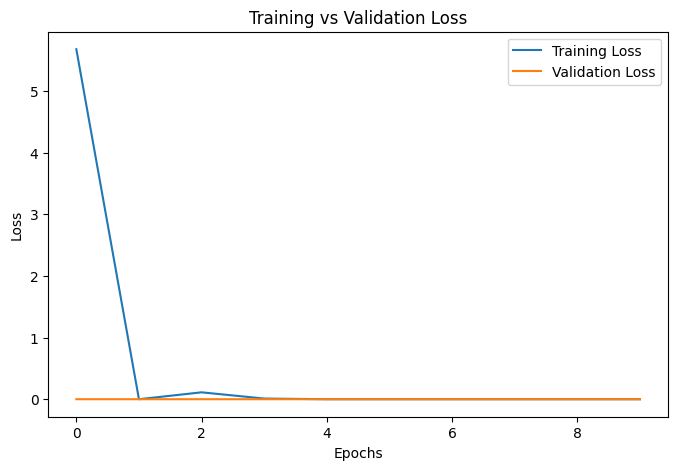

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

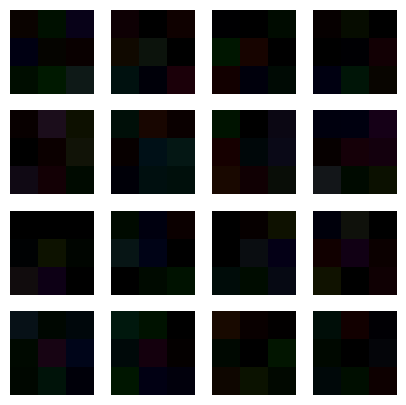

ValueError: operands could not be broadcast together with shapes (128,128,3) (3,3,3) 

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import UnidentifiedImageError

# Set dataset path
dataset_path = "Global"  # Update if needed

# Categories (binary classification: normal vs sick)
categories = ["Normal_images", "Sick_images"]

# Image loading settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")
max_samples = 500  # Limit dataset to 100 total images

data, labels = [], []

# Load images and labels with a limit of 100 samples
total_images = 0
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(valid_extensions)]
    np.random.shuffle(images)  # Shuffle to pick a random subset
    
    for img_name in images:
        if total_images >= max_samples:
            break
        img_path = os.path.join(folder_path, img_name)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            data.append(img_array)
            labels.append(category)
            total_images += 1
        except UnidentifiedImageError:
            continue

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels, num_classes=len(categories))

# Split data
train_X, val_X, train_Y, val_Y = train_test_split(data, labels, test_size=0.2, random_state=42)

# A1: Design and train CNN
input_layer = Input(shape=(128, 128, 3))
x = Conv2D(64, (3,3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out_layer = Dense(len(categories), activation='softmax')(x)
model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# A2: Train the model and plot loss
history = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=10, batch_size=32)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# A3: Evaluate model accuracy
loss, accuracy = model.evaluate(val_X, val_Y)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

# A4: Inspect filters of first Conv layer
filters, biases = model.layers[1].get_weights()
fig, axes = plt.subplots(4, 4, figsize=(5,5))
for i in range(16):
    axes[i//4, i%4].imshow(filters[:,:,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')
plt.show()

# A5: Apply a filter on an image
sample_img = val_X[0]
filter_ = filters[:,:,:,0]  # Take first filter
filtered_img = np.sum(sample_img * filter_, axis=-1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(sample_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Filtered Image")
plt.imshow(filtered_img, cmap='gray')
plt.axis("off")
plt.show()

# A6: Fully connected dense network
fc_model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(categories), activation='softmax')
])

fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fc_model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=10, batch_size=32)
fc_model.summary()

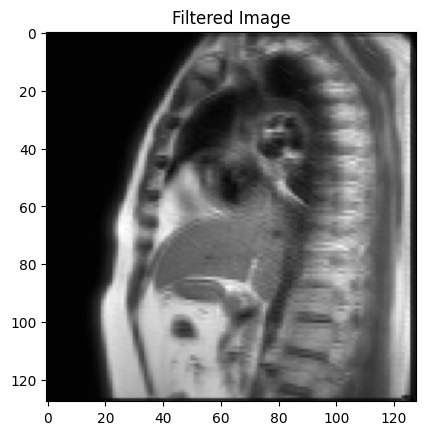

In [5]:
import tensorflow as tf

# Expand dimensions of the sample image to match input shape for convolution
sample_img_expanded = np.expand_dims(sample_img, axis=0)  # Shape: (1, 128, 128, 3)

# Convert filter to a TensorFlow tensor and reshape it for convolution
filter_reshaped = np.expand_dims(filters[:, :, :, 0], axis=-1)  # Shape: (3, 3, 3, 1)

# Apply 2D convolution
filtered_img = tf.nn.conv2d(sample_img_expanded, filter_reshaped, strides=1, padding="SAME")

# Remove batch dimension and visualize
filtered_img = tf.squeeze(filtered_img).numpy()  # Converts to (128, 128)
plt.imshow(filtered_img, cmap='gray')  # No need to index [:,:,0]
plt.title("Filtered Image")
plt.show()
